# Problem Set 1, due September 3rd at 11:59pm 

This problem set is meant to help you familiarize yourself with Python and Pandas. This is meant to be a very gentle introduction -- if you find this problem set to be difficult, you might want to consider taking a more introductory course.

### Before You Start
For this problem set, you should download INF0251-PS1.ipynb from bCourses. Create a local copy of the notebook and rename it LASTNAME_FIRSTNAME-PS1.ipynb. Then edit your renamed file directly in your browser by typing:
```
jupyter notebook <name_of_downloaded_file>
```

Make sure the following libraries load correctly (hit Ctrl-Enter).


In [1]:
#IPython is what you are using now to run the notebook
import IPython
print("IPython version:      %6.6s (need at least 1.0)" % IPython.__version__)

# Numpy is a library for working with Arrays
import numpy as np
print("Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print("SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print("Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__)

# Module for plotting
import matplotlib
print("Maplotlib version:    %6.6s (need at least 1.2.1)" % matplotlib.__version__)

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print("Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__)

IPython version:       7.8.0 (need at least 1.0)
Numpy version:        1.16.5 (need at least 1.7.1)
SciPy version:         1.3.1 (need at least 0.12.0)
Pandas version:       0.25.1 (need at least 0.11.0)
Maplotlib version:     3.1.1 (need at least 1.2.1)
Scikit-Learn version: 0.21.3 (need at least 0.13.1)


### Working in a group?
List the names of other students with whom you worked on this problem set:
- *Person 1*
- *Person 2*
- ...

---

## Introduction to the assignment

For this assignment, you will be using the [Boston Housing Prices Data Set](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names).  Please read about the dataset carefully before continuing -- it is worth investing a few minutes up front otherwise you are likely to be hopelessly confused! Also, if you're new to analyzing data in Python, please make sure to read the relevant readings linked to on Canvas before beginning, otherwise you'll be stabbing in the dark.

Use the following commands to load the dataset:

In [2]:
from sklearn.datasets import load_boston
bdata = load_boston()

The following commands will provide some basic information about the shape of the data:

In [3]:
print(bdata.keys())
print(bdata.feature_names)
print(bdata.data.shape)
print(bdata.target.shape)

# uncomment the following if you want to see a lengthy description of the dataset
# print(bdata.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)
(506,)


In [4]:
boston = pd.DataFrame(bdata.data)

In [5]:
boston.columns = bdata.feature_names[:]
print(boston.shape)

(506, 13)


---

## Part 1: Descriptive analysis

### 1.1: Explore the data

Let's dig into the data a bit to see what we're dealing with. The first thing to do is to make sure you understand how the data is organized, what the data types are, whether there is any missing data, and so forth. Get your bearings on your own, then answer the following questions.

 - 1.1.1: How many different variables are there in the dataset, and how many different observations?
 - 1.1.2: How many instances are classified as neighborhoods where the tract bounds the Charles River? 
 - 1.1.3: Show that dataset does not contain any missing values.
 - 1.1.4: Display the property tax rate in the 5 neighborhoods that have the highest median housing price.

In [6]:
# enter your code here
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
# ques 1.1.1
print(boston.shape)
# ques 1.1.2
print ( sum(boston['CHAS'] ==1))
# ques 1.1.3
print(boston.describe())


(506, 13)
35
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148

In [8]:
boston['MEDV'] = bdata.target
boston.head()
# ques 1.1.4
# method 1: manually extracting index before obtaing tax value
print('---------------------------------------------------------')
print('---manually extracting index before obtaing tax value----')
print(boston['MEDV'].sort_values(ascending=False)[:5])
print(boston['TAX'][[186,225,283,195,166]])
# method 2 : using  argsort
print('---------------------------------------------------------')
print('-------------method 2 : using  argsort-------------------')

print(boston['TAX'][boston['MEDV'].argsort()[-5:]])

---------------------------------------------------------
---manually extracting index before obtaing tax value----
186    50.0
225    50.0
283    50.0
195    50.0
166    50.0
Name: MEDV, dtype: float64
186    193.0
225    307.0
283    198.0
195    255.0
166    403.0
Name: TAX, dtype: float64
---------------------------------------------------------
-------------method 2 : using  argsort-------------------
166    403.0
195    255.0
283    198.0
225    307.0
186    193.0
Name: TAX, dtype: float64


*Provide our answers below:*

 - 1.1.1: Number of variables = 13, Number of observations = 506
 - 1.1.2: 35 Instances have tracts bounding Charles river
 - 1.1.3: From the first line obtained by calling the describe method, we see the the cound for all the variables equal to 506 which is the size of the dataset indicating no missing values
 - 1.1.4: see values expressed in $1000’s displayed above(in previous cell)

### 1.2: Answer some basic questions
 - 1.2.1: What is the median housing price in Boston's most expensive neighborhood?
 - 1.2.2: How many neighborhoods have, on average, less than 5 rooms per dwelling?
 - 1.2.3: What is the property tax rate in the most expensive neighborhood that is also adjacent to the Charles River?
 - 1.2.4: What is the crime rate in the neighborhood with the highest median housing price? 
 - 1.2.5: What is the crime rate in the neighborhood with the lowest median housing price?

In [9]:
# enter your code here
# ques 1.2.1
most_exp_neighborhoods = boston['TAX'][boston['MEDV'].argsort()[-5:]]
print(most_exp_neighborhoods.median())
# ques 1.2.2
print(sum(boston['RM'] < 5))
# ques 1.2.3
sub_boston = boston[boston['CHAS'] ==1]
sub_boston
print('number of neighborhoods adjacent to charles river with most expensive house prices:',sum(sub_boston['MEDV'] == max(sub_boston['MEDV'])))
print(sub_boston['TAX'][sub_boston['MEDV'] == max(sub_boston['MEDV'])])

255.0
15
number of neighborhoods adjacent to charles river with most expensive house prices: 6
162    403.0
163    403.0
283    198.0
369    666.0
370    666.0
372    666.0
Name: TAX, dtype: float64


In [10]:
# ques 1.2.4
print('number of neighborhoods with max MEDV:' ,sum(boston['MEDV'] == max(boston['MEDV'])))
print(boston['CRIM'][boston['MEDV'] == max(boston['MEDV'])])
print('mean : ',np.average(boston['CRIM'][boston['MEDV'] == max(boston['MEDV'])]))
# ques 1.2.5
print('number of neighborhoods with max MEDV:' ,sum(boston['MEDV'] == min(boston['MEDV'])))
print(boston['CRIM'][boston['MEDV'] == min(boston['MEDV'])])
print('mean : ', np.average(boston['CRIM'][boston['MEDV'] == min(boston['MEDV'])]))

number of neighborhoods with max MEDV: 16
161    1.46336
162    1.83377
163    1.51902
166    2.01019
186    0.05602
195    0.01381
204    0.02009
225    0.52693
257    0.61154
267    0.57834
283    0.01501
368    4.89822
369    5.66998
370    6.53876
371    9.23230
372    8.26725
Name: CRIM, dtype: float64
mean :  2.7034118750000005
number of neighborhoods with max MEDV: 2
398    38.3518
405    67.9208
Name: CRIM, dtype: float64
mean :  53.1363


*Provide our answers below:*

 - 1.2.1: Median horse prices for 5 most ecpensive neighborhoods is 255000 dollars
 - 1.2.2: 15 neighborhoods have, on average, less than 5 rooms per dwelling
 - 1.2.3: There are six  neighborhoods adjacent to charles river with the same most expensive house prices. The tax rate per 10,000 dollars are as follows : 403.0,403.0, 198.0, 666.0, 666.0, 666.0 ( more details in 2 cells above)
 
 - 1.2.4: There are 16  neighborhoods with equal  highest median housing price with crime rates as follows: 1.46336, 1.8337, 1.51902, 2.01019, 0.05602, 0.01381, 0.02009, 0.52693,  0.61154, 0.57834, 0.01501, 4.89822, 5.66998, 6.53876, 9.23230, 8.26725.
The average of these crime rates is : 2.703411875
 - 1.2.5: There are 2  neighborhoods with equal  highest median housing price with crime rates as follows: 38.3518, 67.9208.
The average of these crime rates is : 53.1363

### 1.3: Summary statistics

Create a clean, organized table that shows just the following information (no more, no less) for each variable in the dataset. Note that your table should have K rows (one for each variable) and 7 columns, ordered as below:
 - The name of the variable
 - The number of observations with non-missing values
 - The mean of the variable
 - The standard deviation of the variable
 - The minimum value of the variable
 - The median of the variable
 - The maximum value of the variable

In [15]:
# enter your code here
Table = boston.describe().T[:13]
Table.reset_index(inplace=True) # Resets the index, makes factor a column
Table['name'] = Table['index'] 
Table.drop("index",axis=1,inplace=True)

Table = Table[['name','count','mean','std','min','50%','max']]
Table

,name,count,mean,std,min,50%,max
0,CRIM,506.0,3.613524,8.601545,0.00632,0.25651,88.9762
1,ZN,506.0,11.363636,23.322453,0.00000,0.00000,100.0000
2,INDUS,506.0,11.136779,6.860353,0.46000,9.69000,27.7400
3,CHAS,506.0,0.069170,0.253994,0.00000,0.00000,1.0000
4,NOX,506.0,0.554695,0.115878,0.38500,0.53800,0.8710
5,RM,506.0,6.284634,0.702617,3.56100,6.20850,8.7800
6,AGE,506.0,68.574901,28.148861,2.90000,77.50000,100.0000
7,DIS,506.0,3.795043,2.105710,1.12960,3.20745,12.1265
8,RAD,506.0,9.549407,8.707259,1.00000,5.00000,24.0000
9,TAX,506.0,408.237154,168.537116,187.00000,330.00000,711.0000


### 1.4 Simple statistical tests

Using a t-test, compare the median house value in locations that are adjacent to the Charles River to locations that are not adjacent to the Charles River. Do you reject the null hypothesis that prices are equivalent?

In [27]:
# enter your code here
from scipy.stats import ttest_ind
a = sub_boston['MEDV']
sub2= boston[boston['CHAS'] ==0]
b= sub2['MEDV']
t, p = ttest_ind(a, b, equal_var=False)
print('t = %g  p = %g' % (t, p))

t = 3.11329  p = 0.00356717


*Write your response here.*
Based on the relatively large t-score value  and the p value of less that 5%, we have enough evidence to reject the null hypothesis that states that the mean of the median prices are equivalent between the two groups (  located  adjacent to the Charles River versus not)

---

## Part 2: Histograms and Scatterplots


### 2.1: Histogram of housing prices

Below you will find some very basic code to make a very basic histogram of median housing prices (the "target" variable) for your dataset.  Your first task is to make this graph look pretty by doing the following:

1. Add appropriate labels to the x and y axes, make sure to include units
2. Change the bin width on the histogram to be $1000
3. Remove the axes on the top and right side of the plot window
4. Change the color of the bars to be green, and remove the black borders from the bars


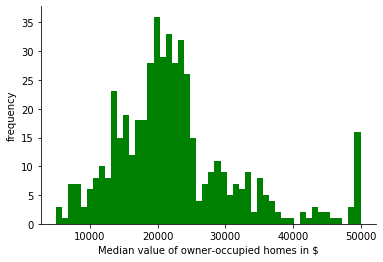

In [52]:
# prepare IPython to work with matplotlib and import the library to something convenient
# %matplotlib inline  
import matplotlib.pyplot as plt  

ax = plt.subplot(111)

# edit the code below to make the graph look good
ax.hist(bdata.target *1000, facecolor='g',bins=50 ,edgecolor = "none")
ax.set_ylabel('frequency')
ax.set_xlabel('Median value of owner-occupied homes in $')

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')




### 2.2: Scatter plot of housing prices and crime

Use matplotlib to create a scatter plot that shows the relationship between the median value of the home (y-axis) and the per-capita crime rate (x-axis).  Properly label your axes, and make sure that your graphic looks polished and professional.


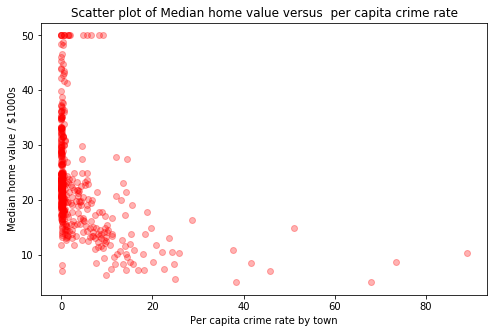

In [76]:
# enter your code here
plt.figure(figsize=(8,5))
plt.scatter(boston['CRIM'],boston['MEDV'],color='r',alpha = 0.3)
plt.xlabel('Per capita crime rate by town')
plt.ylabel('Median home value / $1000s')
plt.title('Scatter plot of Median home value versus  per capita crime rate')
plt.show();

In [30]:
import scipy.stats
## Calculating the correlation between the 
print('pearson ', scipy.stats.pearsonr(boston['CRIM'], boston['MEDV']) )

print(scipy.stats.spearmanr(boston['CRIM'], boston['MEDV']) )

pearson  (-0.3883046085868116, 1.1739870821941207e-19)
SpearmanrResult(correlation=-0.5588909488368801, pvalue=6.5533358892281775e-43)


### 2.3: Interpret

What do you observe in the above scatter plot? Does there appear to be a relationship between crime rates and housing prices in Boston? Calculate the correlation between these two variables. Do you think this relationship is causal, or just a correlation? Justify your position.

*Write your thoughts here (1-2 paragraphs).*
From the scatter plot, I observe that the more expensive neighbourhoods tend to have lower crime rates whereas of the least expensive neighbourhoods tend to have the highest crime rates. From the correlation coefficients calculated using both the Pearson and Spearman correlation coefficient, we obtain the values () for the correlation coefficient and the p value. The small p value indicates that the results are significant and the negative correlation factor value indicates a negative correlation. 
I think this relationship is just a correlation because the expensive neighborhoods could potentially have more resources allocated to them which results in more effective crime combating efforts as compared to the less expensive neighborhoods. In additon a neighborhood with high crime rate could still be more expensive due to the intrisic value of the land area such as proximity to the ocean. As such high crime rates does not necessarily cause the neighborhood to have higher price

### 2.4 Correlation Matrix

Calculate the correlation of every pair of variables in the dataset. Create a *K* x *K* matrix where the value in the (*i*,*j*) cell is the correlation between the *i*th and *j*th variable. Show off your skills by coloring the cell so that large positive correlations appear green and large negative correlations appear red (use a gradient to make this pretty). What two variables appear to me most positively and negatively correlated?

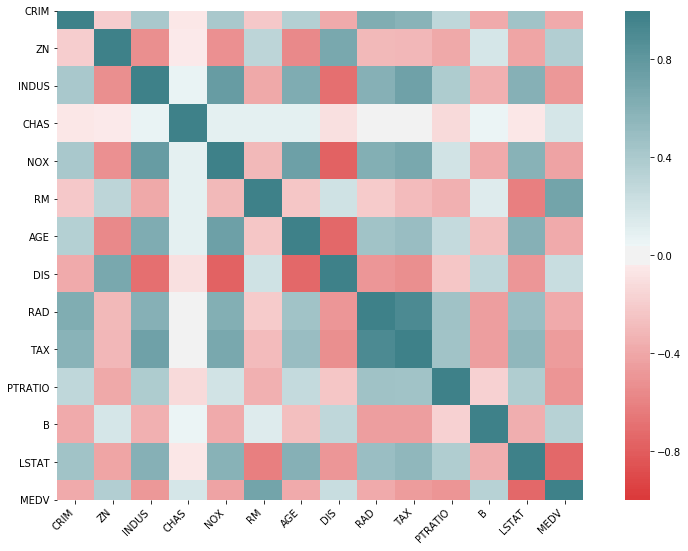

In [47]:
# # enter your code here
import seaborn as sns
plt.figure(figsize=(15, 9))
corr = boston.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(12, 205, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


*Write your response here.*


The variable pair  that appears to be the most positively correlated are TAX (full-value property-tax rate per 10,000 dollars) and RAD (index of accessibility to radial highways).

From the correlation matrix colors there appears to the 3 variable pairs that are most negatively correlated. The variable pairs that appears to be the most negatively correlated are are follows:
1. DIS (weighted distances to five Boston employment centres) and INDUS (proportion of non-retail business acres per town)
2. DIS (weighted distances to five Boston employment centres) and NOX (nitric oxides concentration (parts per 10 million))
3. DIS (weighted distances to five Boston employment centres) and Age (proportion of owner-occupied units built prior to 1940)

### 2.5 Create your own (creative and effective) visualization

Use another type of graph or chart to illustrate an interesting pattern in the data.  Be creative in your visualization, and make sure to produce a "publication-quality" graph.  Points will be given for useful and creative graphs; points will be deducted for confusing issues like unlabeled axes.  If you're new to data visualization, [this guide](http://pubs.aeaweb.org/doi/pdfplus/10.1257/jep.28.1.209) is a good place to start.

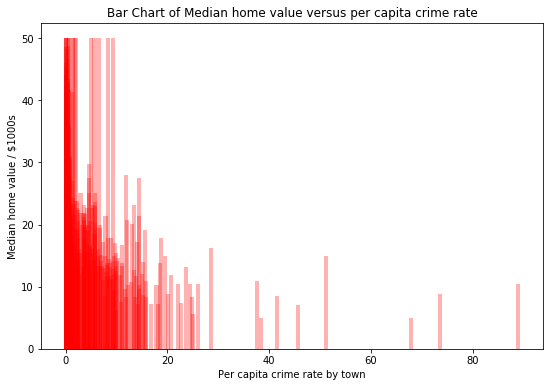

In [73]:
# enter your code here
plt.figure(figsize=(9,6))
plt.bar(boston['CRIM'],boston['MEDV'],color='r',alpha = 0.3)
plt.xlabel('Per capita crime rate by town')
plt.ylabel('Median home value / $1000s')
plt.title('Bar Chart of Median home value versus per capita crime rate')
plt.show()

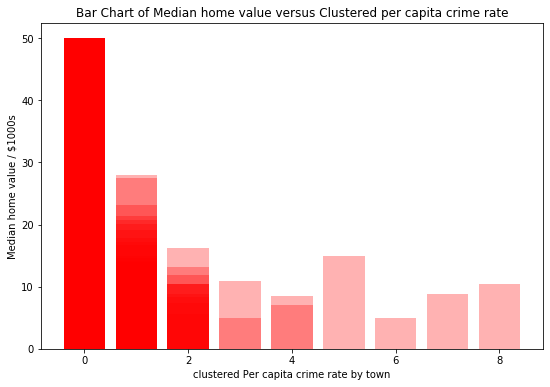

In [74]:
# Final Visualisation
plt.figure(figsize=(9,6))
plt.bar(np.floor(boston['CRIM']/10),boston['MEDV'],color = 'r',alpha = 0.3)
plt.xlabel('clustered Per capita crime rate by town')
plt.ylabel('Median home value / $1000s')
plt.title('Bar Chart of Median home value versus Clustered per capita crime rate')
plt.show()

In [65]:
#np.unique(np.floor(boston['CRIM']/10))


array([0., 1., 2., 3., 4., 5., 6., 7., 8.])